#Importing necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression

#Uploading the file


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving student_scores - student_scores.csv to student_scores - student_scores.csv


#Reading the file

In [ ]:
student_scores=list(uploaded.keys())[0]
df=pd.read_csv(student_scores)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#Overview of Dataset

In [ ]:
#Identifying the datatypes
df.dtypes

,0
Hours,float64
Scores,int64


In [ ]:
#Handling missing values
mv=df.isnull().sum()
print(mv)

#Removing duplicates
df=df.drop_duplicates()

Actual       0
Predicted    0
dtype: int64


In [ ]:
#Description of the datset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#Common information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#Correlation between Hours and scores

In [ ]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


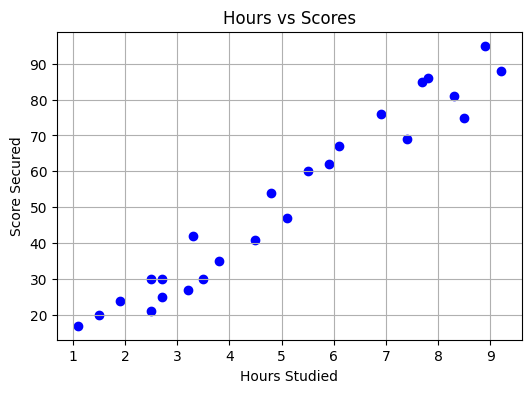

In [ ]:
#Hours vs Score
plt.figure(figsize=(6,4))
plt.scatter(df['Hours'],df['Scores'],color='blue')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score Secured')
plt.grid('True')
plt.show()

In [ ]:
#Preprocessing data

X=df.iloc[:,:-1].values
y=df.iloc[:,1].values


In [ ]:
#Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#Training the model

regressor=LinearRegression()
regressor.fit(X_train,y_train)

print('Training complete')

Training complete


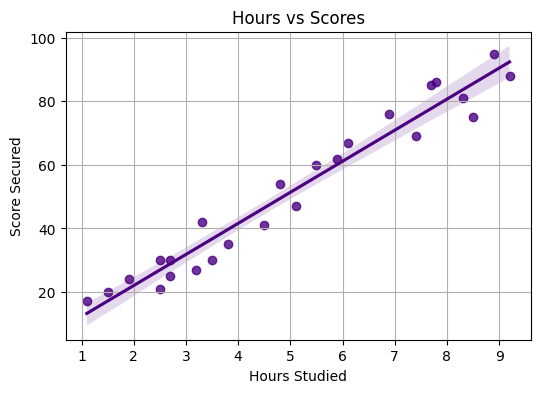

In [ ]:
#Plotting regression line and test data
line = regressor.coef_*X+regressor.intercept_

plt.figure(figsize=(6,4))
sns.regplot(x='Hours',y='Scores',marker='o',color='indigo',data=df)
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score Secured')
plt.grid('True')
plt.show()

In [ ]:
#Training score
training_score=round(regressor.score(X_train,y_train)*100,2)
print('Training Score:',training_score)

Training Score: 95.16


#Making Predictions

In [ ]:
print(X_test) #Hours data being tested
y_pred = regressor.predict(X_test)
print(y_pred) # Predicted data

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


Comparing Actual vs Predicted

In [ ]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


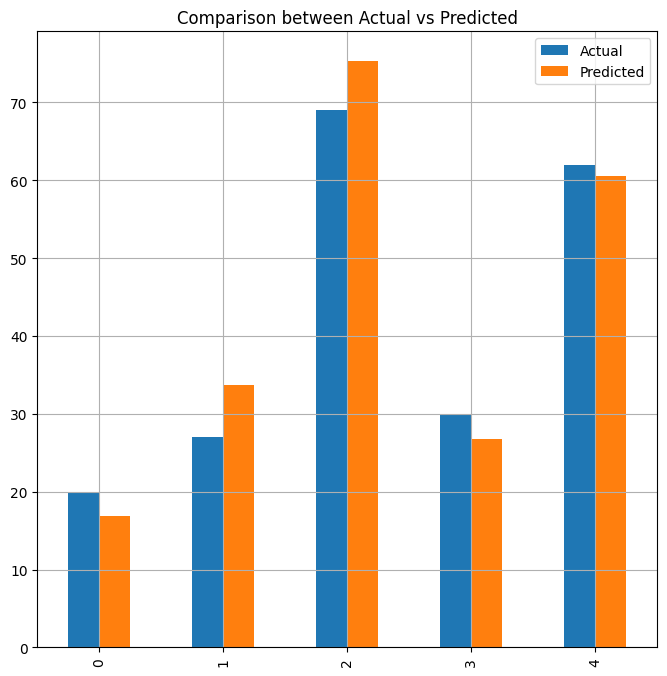

In [ ]:
#actual vs predicted using Bar plot

df.plot(kind='bar',figsize=(8,8))
plt.grid('True')
plt.title('Comparison between Actual vs Predicted')
plt.show()

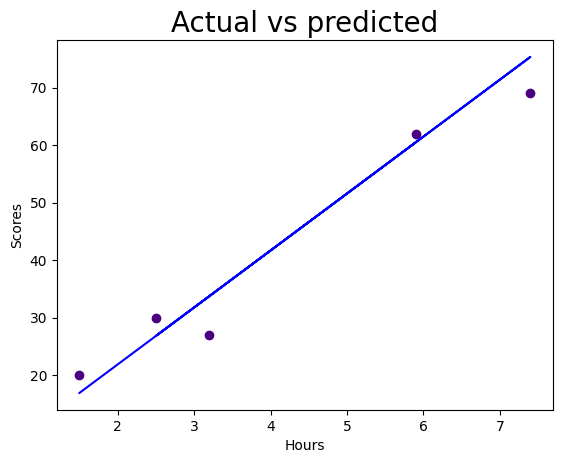

In [ ]:
#Actual vs predicted using Scatter plot

plt.scatter(x=X_test,y=y_test,color='indigo')
plt.plot(X_test,y_pred,color='blue')
plt.title('Actual vs predicted', size= 20)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#Calculating Accuracy of model





In [ ]:
#Accuracy of the model
accuracy=round(r2_score(y_test,y_pred)*100,2)
print('Accuracy:',accuracy)

Accuracy: 94.55


It has approximately 94.55% accuracy

#Predictive score of a student studying for 9.25hrs/day

In [ ]:
hours = 9.25
score = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(score[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


The student will likely to score 93.6%

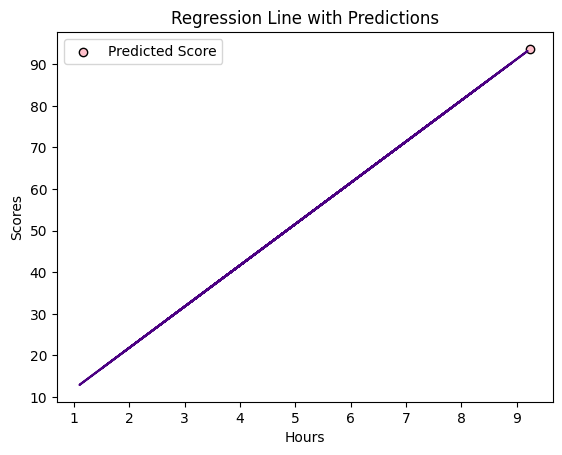

In [ ]:
#Regression model with prediction
# Assuming 'regressor' is your trained LinearRegression model and 'X_test', 'y_test' are your test data
y_pred = regressor.predict(X_test)

plt.scatter(9.25,score,color='black', label='Predicted Score',facecolor='pink')
plt.plot(X, line,color='indigo')
plt.title('Regression Line with Predictions')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()

plt.show()

#Evaluation of Model

In [ ]:
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
